<a href="https://colab.research.google.com/github/Lilian-Moraes/Telecom_X_prevendo_churn_partII/blob/main/telecom_x_prevendo_churn_partii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Telecom X Parte 2 - Murilo

## Objetivos


 - Pré-processamento de dados para Machine Learning

 - Construção e avaliação de modelos preditivos

 - Interpretação dos resultados e entrega de insights

 - Comunicação técnica com foco estratégico

## Importações


In [ ]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/sthemonica/alura-voz/refs/heads/main/Dados/Telco-Customer-Churn.json"

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)

df

## ETL

In [ ]:
import pandas as pd

In [ ]:
df_plano = pd.json_normalize(data)
df_plano

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
df_plano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
# Verifique se há valores únicos em cada coluna.
for col in df_plano.columns:
  print(f"valores únicos'{col}': {df_plano[col].nunique()}")
  if df_plano[col].nunique() < 50: # Imprima os valores apenas se não forem muitos.
    print(df_plano[col].unique())
    print('-' * 50)

valores únicos'customerID': 7267
valores únicos'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos'customer.gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos'customer.tenure': 73
valores únicos'phone.PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos'internet.InternetService': 3
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
valores únicos'internet.OnlineSecurity': 3
['No' 'Yes' 'No internet service']
---------

In [ ]:
#Duplicados
print("Numero de duplicados", df_plano.duplicated().sum())

Numero de duplicados 0


In [ ]:
# Nulos
print("Numero de Nulos", df_plano.isnull().sum())

Numero de Nulos customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [ ]:
# Vazios ou em branco
df_plano.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [ ]:
#Alterando a coluna "account.Charges.Total" para Float
df_plano['account.Charges.Total'] = pd.to_numeric(df_plano['account.Charges.Total'], errors='coerce')
print(df_plano['account.Charges.Total'].dtype)

float64


In [ ]:
# Eliminando as colunas de Churn
df_plano = df_plano[df_plano['Churn'].str.strip() != '']
print("Número de linhas após eliminar 'Churn':", len(df_plano))

Número de linhas após eliminar 'Churn': 7043


In [ ]:
# Vazios ou em branco
df_plano.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [ ]:
df_plano = df_plano.drop('Total.Day', errors='ignore')

In [ ]:
# Calculando os gastos diários
df_plano['Total.Day'] = ((df_plano['account.Charges.Total'] / df_plano['customer.tenure']) /30 ).round(2)

# Inserindo a coluna na posição 19
df_plano.insert(19, 'Total.Day', df_plano.pop('Total.Day'))

In [ ]:
df_plano

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,1.90,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.84,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,1.55,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,2.30,67.85,4627.65


In [ ]:
df_plano.to_csv('df_plano.csv', index=False)

#Análises Iniciais

## Churn por Gênero

In [ ]:
import plotly.express as px

In [ ]:
color_map = {'Male': 'blue', 'Female': 'pink'}
px.histogram(df_plano, x = 'customer.gender', text_auto = True, color = 'Churn', barmode = 'group', color_discrete_map=color_map)

In [ ]:
# Agrupar por tenure e Churn
df_grouped = df_plano.groupby(['customer.tenure', 'Churn']).size().unstack(fill_value=0)

# Calcular a % de churn por tenure
df_grouped['churn_rate'] = (df_grouped.get('Yes', 0) / df_grouped.sum(axis=1)) * 100

# Mostrar o resultado
print(df_grouped[['churn_rate']])


Churn            churn_rate
customer.tenure            
0                  0.000000
1                 61.990212
2                 51.680672
3                 47.000000
4                 47.159091
...                     ...
68                 9.000000
69                 8.421053
70                 9.243697
71                 3.529412
72                 1.657459

[73 rows x 1 columns]


## Churn por Ternure

In [ ]:
fig = px.line(df_grouped.reset_index(),
              x='customer.tenure',
              y='churn_rate',
              markers=True,
              title='Taxa de Churn (%) por Tenure')
fig.show()

##Ternure Vs Encargos

In [ ]:
px.scatter(df_plano,
           x="customer.tenure",
           y="account.Charges.Monthly",
           color="Churn",
           title="Tenure vs Encargos mensais por Churn")

## Churn por Mês e Ano

In [ ]:
px.histogram(df_plano, x = 'account.Contract', text_auto = True, color = 'Churn', barmode = 'group')

## Account Charges por Mês

In [ ]:
px.box(df_plano, x = 'Churn', y = 'account.Charges.Monthly', color = 'Churn')

## Churn Telefonia

In [ ]:
px.histogram(df_plano, x = 'phone.PhoneService',  text_auto = True, color = 'Churn', barmode = 'group')

## Churn Serviço de Internet

In [ ]:
px.histogram(df_plano, x = 'internet.InternetService',  text_auto = True, color = 'Churn', barmode = 'group')

## Churn Streaming TV

In [ ]:
px.histogram(df_plano, x = 'internet.StreamingTV',  text_auto = True, color = 'Churn', barmode = 'group')

## Churn por Metodo de Pagamento

In [ ]:
px.histogram(df_plano, x = 'account.PaymentMethod',  text_auto = True, color = 'Churn', barmode = 'group')

## Remoção de Colunas Irrelevantes

In [ ]:
#Visualizar as colunas
df_plano.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [ ]:
#Visualizar os dados
df_plano.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
#Retirar coluna 'customerID'
df_plano = df_plano.drop('customerID', axis=1)

In [ ]:
#Visualizar alteração
df_plano.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Preparação dos dados

In [ ]:
#Transformar colunas categóricas em object
colunas_categoricas = df_plano.select_dtypes(include=['object']).columns
print(colunas_categoricas)

Index(['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Total'],
      dtype='object')


In [ ]:
df_plano = pd.get_dummies(df_plano, columns=colunas_categoricas, drop_first=True)

In [ ]:
df_plano.head()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,Churn_No,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,...,account.Charges.Total_995.35,account.Charges.Total_996.45,account.Charges.Total_996.85,account.Charges.Total_996.95,account.Charges.Total_997.65,account.Charges.Total_997.75,account.Charges.Total_998.1,account.Charges.Total_999.45,account.Charges.Total_999.8,account.Charges.Total_999.9
0,0,9,65.6,True,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0,9,59.9,True,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0,4,73.9,False,True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,1,13,98.0,False,True,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1,3,83.9,False,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


## Normalizando Churn

In [ ]:
df_plano['Churn_Yes'].value_counts(normalize=True)

,proportion
Churn_Yes,
False,0.73463
True,0.26537


# Machine Learning

In [ ]:
import numpy as np

In [ ]:
# Define features (X) and target (y)
X = df_plano.drop('Churn_Yes', axis=1)
y = df_plano['Churn_Yes']

print(np.isinf(X).sum())
print(np.isnan(X).sum())

In [ ]:
#Importar as bibliotecas
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
#Preencher valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

#Balanceamento de classes com o SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_imputed, y)

In [ ]:
df_plano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Columns: 6561 entries, customer.SeniorCitizen to account.Charges.Total_999.9
dtypes: bool(6558), float64(1), int64(2)
memory usage: 45.6 MB


## Análise de Correlação

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Separação dos dados: treino e teste

In [ ]:
#Importação da biblioteca scikitlearn
from sklearn.model_selection import train_test_split

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, stratify = y, test_size = 0.05, random_state = 5)
X_treino, X_val, y_treino, y_val = train_test_split(X_treino, y_treino, stratify = y_treino, random_state = 5)

## Seleção dos modelos: algoritmos

In [ ]:
#Importar as bibliotecas
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Definir os valores do max_depth
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

In [ ]:
#Avaliar acurácia
arvore.fit(X_treino, y_treino)
print(f'Acurácia de treino: {arvore.score(X_treino, y_treino)}')
print(f'Acurácia de validação: {arvore.score(X_val, y_val)}')

Acurácia de treino: 0.7931034482758621
Acurácia de validação: 0.780035863717872


## Diferença entre acurária de treino e teste pode sugerir p

In [ ]:
# Criar uma árvore de decisão com nova regularização
arvore = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)

In [ ]:
# Treinar o modelo
arvore.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [ ]:
# Avaliar o modelo
print(f'Acurácia de treino: {arvore.score(X_treino, y_treino)}')
print(f'Acurácia de validação: {arvore.score(X_val, y_val)}')

Acurácia de treino: 0.8072553318716365
Acurácia de validação: 0.7782426778242678


## validação cruzada com GridSearch

In [ ]:
#Importar a biblioteca
from sklearn.model_selection import GridSearchCV

In [ ]:
# Definir os parâmetros a serem testados
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

In [ ]:
# Criar o modelo
arvore = DecisionTreeClassifier(random_state=42)

In [ ]:
# Criar o objeto GridSearchCV
grid_search = GridSearchCV(arvore, param_grid, cv=5, scoring='accuracy')

In [ ]:
# Executar a busca
grid_search.fit(X_treino, y_treino)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
# Imprimir os melhores parâmetros e a melhor acurácia
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor acurácia:", grid_search.best_score_)

Melhores parâmetros: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor acurácia: 0.794901153114362


In [ ]:
# Avaliar o modelo com os melhores parâmetros nos dados de validação
melhor_modelo = grid_search.best_estimator_
print("Acurácia de validação com os melhores parâmetros:", melhor_modelo.score(X_val, y_val))

Acurácia de validação com os melhores parâmetros: 0.7770472205618649


##FeatureEngineering interagindo entre as features

In [ ]:
df_plano.columns

Index(['customer.SeniorCitizen', 'customer.tenure', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total', 'Churn_Yes',
       'customer.gender_Male', 'customer.Partner_Yes',
       'customer.Dependents_Yes', 'phone.PhoneService_Yes',
       'phone.MultipleLines_No phone service', 'phone.MultipleLines_Yes',
       'internet.InternetService_Fiber optic', 'internet.InternetService_No',
       'internet.OnlineSecurity_No internet service',
       'internet.OnlineSecurity_Yes',
       'internet.OnlineBackup_No internet service',
       'internet.OnlineBackup_Yes',
       'internet.DeviceProtection_No internet service',
       'internet.DeviceProtection_Yes',
       'internet.TechSupport_No internet service', 'internet.TechSupport_Yes',
       'internet.StreamingTV_No internet service', 'internet.StreamingTV_Yes',
       'internet.StreamingMovies_No internet service',
       'internet.StreamingMovies_Yes', 'account.Contract_One year',
       'account.Contract_Two year', 'ac

## Interações entre Features

In [ ]:
# Contrato e Internet
def combinar_contrato_internet(row):
    if row['internet.InternetService_No'] == 1:
        return 'Sem_Internet'
    elif row['account.Contract_One year'] == 0 and row['account.Contract_Two year'] == 0:
        return 'Mensal_' + ('Fibra' if row['internet.InternetService_Fiber optic'] == 1 else 'DSL')
    elif row['account.Contract_One year'] == 1:
        return 'Anual_' + ('Fibra' if row['internet.InternetService_Fiber optic'] == 1 else 'DSL')
    elif row['account.Contract_Two year'] == 1:
        return 'Bienal_' + ('Fibra' if row['internet.InternetService_Fiber optic'] == 1 else 'DSL')
    else:
        return 'Desconhecido'

df_plano['Contrato_Internet'] = df_plano.apply(combinar_contrato_internet, axis=1)
df_plano = pd.get_dummies(df_plano, columns=['Contrato_Internet'], prefix='Contrato_Internet', drop_first = True)

In [ ]:
# Serviços Adicionais e Segurança
servicos = ['internet.OnlineSecurity_Yes', 'internet.OnlineBackup_Yes', 'internet.DeviceProtection_Yes', 'internet.TechSupport_Yes']
df_plano['Total_Servicos'] = df_plano[[col for col in df_plano.columns if any(substring in col for substring in servicos)]].sum(axis=1)

In [ ]:
# Streaming e Tipo de Internet
df_plano['Streaming_Internet'] = df_plano['internet.StreamingTV_Yes'] + df_plano['internet.StreamingMovies_Yes']

In [ ]:
# Ratios e Proporções
df_plano['Charge_Tempo_Ratio'] = df_plano['account.Charges.Monthly'] / (df_plano['customer.tenure'] + 1e-9) # Adiciona um pequeno valor para evitar divisão por zero

In [ ]:
# Features Binárias (Flags)
df_plano['Idoso_Com_Dependentes'] = ((df_plano['customer.SeniorCitizen'] == 1) & (df_plano['customer.Dependents_Yes'] == 1)).astype(int)

In [ ]:
# Exibir as primeiras linhas do DataFrame com as novas features
print(df_plano.head())

   customer.SeniorCitizen  customer.tenure  Total.Day  \
0                       0                9       2.20   
1                       0                9       2.01   
2                       0                4       2.34   
3                       1               13       3.17   
4                       1                3       2.97   

   account.Charges.Monthly  account.Charges.Total  Churn_Yes  \
0                     65.6                 593.30      False   
1                     59.9                 542.40      False   
2                     73.9                 280.85       True   
3                     98.0                1237.85       True   
4                     83.9                 267.40       True   

   customer.gender_Male  customer.Partner_Yes  customer.Dependents_Yes  \
0                 False                  True                     True   
1                  True                 False                    False   
2                  True                 False     

In [ ]:
# Exibir informações sobre o DataFrame para verificar os tipos de dados
print(df_plano.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 42 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 non-n

## Testar novas features com RandomForest

In [ ]:
#Importar as bibliotecas
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Criar o modelo RandomForest
floresta = RandomForestClassifier(n_estimators=100, random_state=42) # Ajuste os hiperparâmetros

In [ ]:
# Treinar o modelo com os dados de treino
floresta.fit(X_treino, y_treino)

RandomForestClassifier(random_state=42)

In [ ]:
# Avaliar o modelo: fazer previsões com os dados de teste
y_pred = floresta.predict(X_teste)

In [ ]:
# Calcular a acurácia e outras métricas de avaliação
acuracia = accuracy_score(y_teste, y_pred)
print(f"Acurácia do modelo RandomForest: {acuracia:.4f}")

Acurácia do modelo RandomForest: 0.7847


In [ ]:
# Exibir o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.83      0.89      0.86       259
        True       0.62      0.50      0.55        94

    accuracy                           0.78       353
   macro avg       0.72      0.69      0.71       353
weighted avg       0.77      0.78      0.78       353



## Análise do relatório de classificação

## Desbalanceamento utilizando o SMOTE

In [ ]:
#Importar biblioteca
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Preencher novamente valores ausentes com a média ANTES de dividir os dados
X = X.fillna(X.mean())

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Aplicar SMOTE ao conjunto de treino
smote = SMOTE(random_state=42)
X_treino_resampled, y_treino_resampled = smote.fit_resample(X_treino, y_treino)

In [ ]:
# Criar o modelo RandomForest
floresta = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Re-treinar o modelo com os dados de treino balanceados
floresta.fit(X_treino_resampled, y_treino_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
# Fazer previsões com os dados de teste
y_pred = floresta.predict(X_teste)

In [ ]:
# Calcular a acurácia e outras métricas de avaliação
acuracia = accuracy_score(y_teste, y_pred)
print(f"Acurácia do modelo RandomForest: {acuracia:.4f}")

Acurácia do modelo RandomForest: 0.7871


In [ ]:
# Exibir o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.85      0.86      0.86      1036
        True       0.60      0.58      0.59       373

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.78      0.79      0.79      1409



## Validação Cruzada Estratificada

In [ ]:
#importar biblioteca
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [ ]:
# Criar o modelo RandomForest
floresta = RandomForestClassifier(n_estimators=100, random_state=42) # Ajuste os hiperparâmetros

In [ ]:
# Criar o objeto StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Ajuste o número de folds

In [ ]:
# Executar a validação cruzada
scores = cross_val_score(floresta, X, y, cv=skf, scoring='accuracy')

In [ ]:
# Imprimir os resultados da validação cruzada
print("\nAcurácia da Validação Cruzada:")
print(scores)
print(f"\nMédia da Acurácia da Validação Cruzada: {scores.mean():.4f}")
print(f"Desvio Padrão da Acurácia da Validação Cruzada: {scores.std():.4f}")


Acurácia da Validação Cruzada:
[0.78992193 0.79134138 0.78495387 0.80113636 0.79403409]

Média da Acurácia da Validação Cruzada: 0.7923
Desvio Padrão da Acurácia da Validação Cruzada: 0.0053


## Matriz da Confusão

In [ ]:
#importar bibliotecas
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Inicializar uma lista para armazenar as previsões
y_pred = np.array([])
y_true = np.array([])

In [ ]:
# Iterar sobre os folds da validação cruzada
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo com os dados de treino
    floresta.fit(X_train, y_train)

    # Fazer previsões com os dados de teste
    y_pred_fold = floresta.predict(X_test)

    # Armazenar os valores reais e as previsões
    y_true = np.concatenate((y_true, y_test))
    y_pred = np.concatenate((y_pred, y_pred_fold))

In [ ]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

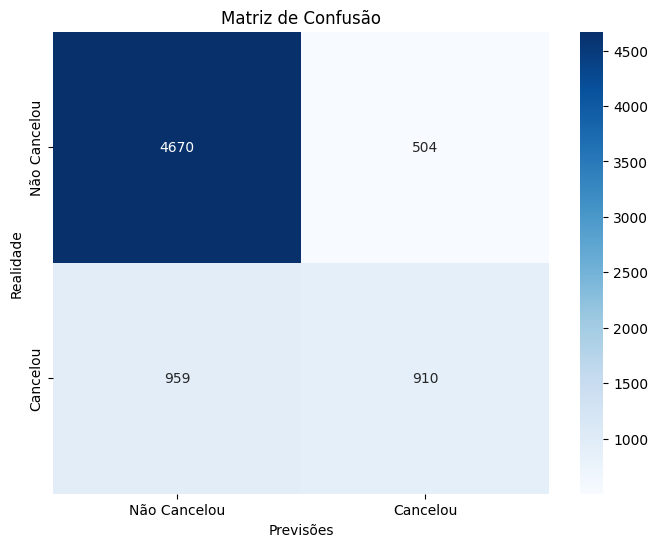

In [ ]:
# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Cancelou', 'Cancelou'],
            yticklabels=['Não Cancelou', 'Cancelou'])
plt.xlabel('Previsões')
plt.ylabel('Realidade')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# Imprimir o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_true, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      5174
         1.0       0.64      0.49      0.55      1869

    accuracy                           0.79      7043
   macro avg       0.74      0.69      0.71      7043
weighted avg       0.78      0.79      0.78      7043



## Ajuste do Modelo

In [ ]:
#importar as bibliotecas
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

In [ ]:
# Executar a validação cruzada e obter as probabilidades previstas
y_proba = cross_val_predict(floresta, X, y, cv=skf, method='predict_proba')

In [ ]:
# Obter as probabilidades para a classe positiva (Churn = 1)
y_proba = y_proba[:, 1]

In [ ]:
# Calcular a curva Precision-Recall
precision, recall, thresholds = precision_recall_curve(y, y_proba)

In [ ]:
# Calcular o F1-score para diferentes limiares
f1_scores = 2 * (precision * recall) / (precision + recall)

In [ ]:
# Encontrar o limiar que maximiza o F1-score
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Melhor limiar encontrado: {best_threshold:.3f}")

Melhor limiar encontrado: 0.293


In [ ]:
# Converter as probabilidades em previsões com o limiar otimizado
y_pred = (y_proba >= best_threshold).astype(int)

In [ ]:
# Calcular a matriz de confusão
cm = confusion_matrix(y, y_pred)

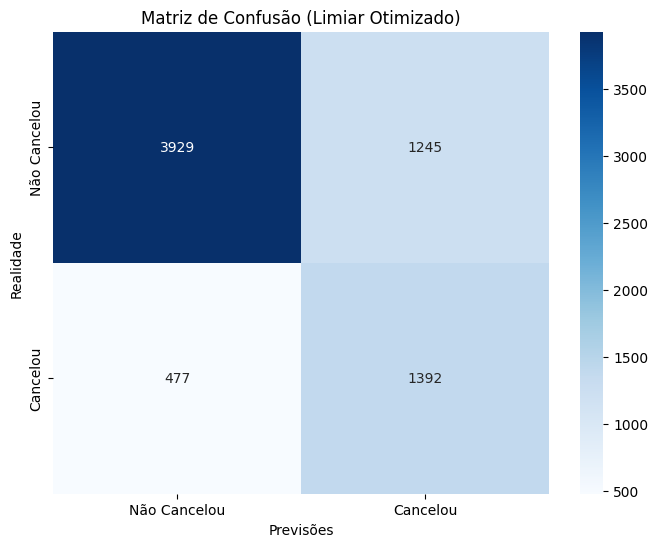

In [ ]:
# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Cancelou', 'Cancelou'],
            yticklabels=['Não Cancelou', 'Cancelou'])
plt.xlabel('Previsões')
plt.ylabel('Realidade')
plt.title('Matriz de Confusão (Limiar Otimizado)')
plt.show()

In [ ]:
# Imprimir o relatório de classificação
print("\nRelatório de Classificação (Limiar Otimizado):")
print(classification_report(y, y_pred))


Relatório de Classificação (Limiar Otimizado):
              precision    recall  f1-score   support

       False       0.89      0.76      0.82      5174
        True       0.53      0.74      0.62      1869

    accuracy                           0.76      7043
   macro avg       0.71      0.75      0.72      7043
weighted avg       0.80      0.76      0.77      7043



## Curva ROC, para calcular a AUC e o ponto ótimo: análise de verdadeiro e falso positivo

In [ ]:
#Importar a biblioteca
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [ ]:
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y, y_proba)

In [ ]:
# Calcular a AUC
roc_auc = auc(fpr, tpr)

In [ ]:
# Calcular a raiz quadrada da soma dos quadrados das diferenças
gmeans = np.sqrt(tpr * (1-fpr))

In [ ]:
# Encontrar o índice do ponto com maior média geométrica
ix = np.argmax(gmeans)
print('Melhor Limiar=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Melhor Limiar=0.290000, G-Mean=0.752


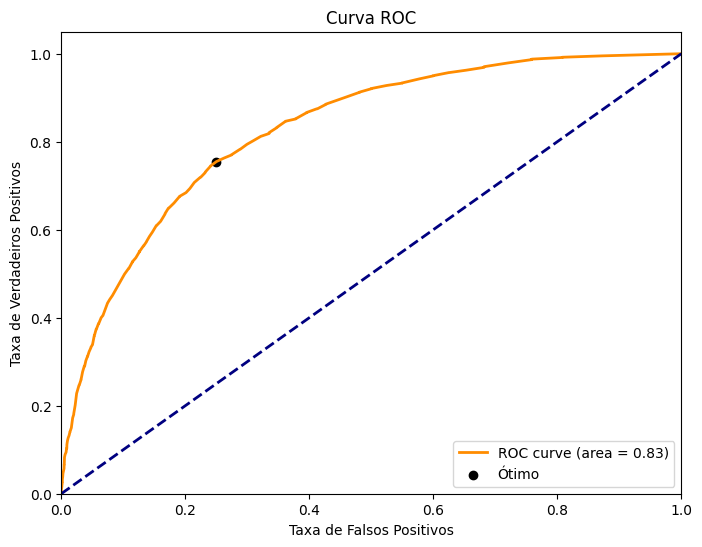

In [ ]:
# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Ótimo')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Imprimir o valor da AUC
print('AUC: %.3f' % roc_auc)

AUC: 0.826


##Interpretação e conlusão

# Resumo dos resultados


Modelo Base (Limiar Padrão 0.5):
* Acurácia: 0.79
* Precisão (Cancelou): 0.64
* Recall (Cancelou): 0.49

Modelo com Limiar Otimizado (Foco no F1-Score):
* Acurácia: 0.76
* Precisão (Cancelou): 0.53
* Recall (Cancelou): 0.74

AUC:
* 0.826